In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
df = pd.read_csv('/content/electricity_bill_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fan              45345 non-null  int64  
 1   Refrigerator     45345 non-null  float64
 2   AirConditioner   45345 non-null  float64
 3   Television       45345 non-null  float64
 4   Monitor          45345 non-null  float64
 5   MotorPump        45345 non-null  int64  
 6   Month            45345 non-null  int64  
 7   City             45345 non-null  object 
 8   Company          45345 non-null  object 
 9   MonthlyHours     45345 non-null  int64  
 10  TariffRate       45345 non-null  float64
 11  ElectricityBill  45345 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 4.2+ MB


In [4]:
df.columns

Index(['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor',
       'MotorPump', 'Month', 'City', 'Company', 'MonthlyHours', 'TariffRate',
       'ElectricityBill'],
      dtype='object')

In [5]:

for col in ['Month', 'City', 'Company']:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])


for col in ['Units_Consumed', 'Bill_Amount']:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())


In [6]:
df = pd.get_dummies(df, drop_first=True)

In [7]:
x_mean = df["MonthlyHours"].mean()
y_mean = df["ElectricityBill"].mean()
print("\nMean of Monthly Hours:", x_mean)
print("Mean of Electricity Bill:", y_mean)




Mean of Monthly Hours: 515.0832065277318
Mean of Electricity Bill: 4311.771306649024


In [8]:

numerator = ((df["MonthlyHours"] - x_mean) * (df["ElectricityBill"] - y_mean)).sum()
denominator = ((df["MonthlyHours"] - x_mean) ** 2).sum()

B1 = numerator / denominator
print("\nCalculated Slope (B1):", B1)



Calculated Slope (B1): 8.396294112929326


In [9]:
B0 = y_mean - (B1 * x_mean)
print("Calculated Intercept (B0):", B0)

Calculated Intercept (B0): -13.018787988530676


In [10]:
df["Predicted_ElectricityBill"] = B0 + B1 * df["MonthlyHours"]


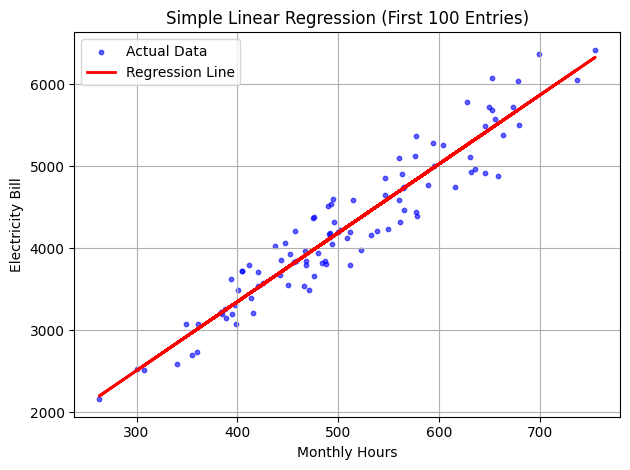

In [12]:
sample_df = df.head(100)
plt.scatter(sample_df["MonthlyHours"], sample_df["ElectricityBill"], color='blue', s=10, alpha=0.6, label="Actual Data")
plt.plot(sample_df["MonthlyHours"], sample_df["Predicted_ElectricityBill"], color='red', linewidth=2, label="Regression Line")
plt.xlabel("Monthly Hours")
plt.ylabel("Electricity Bill")
plt.title("Simple Linear Regression (First 100 Entries)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
rmse = np.sqrt(((df["ElectricityBill"] - df["Predicted_ElectricityBill"]) ** 2).mean())
print("\nRoot Mean Squared Error (RMSE):", rmse)



Root Mean Squared Error (RMSE): 305.4237391524915
